LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# resd teh CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/1.Kuliah/Semester-7/Machine_Learning/Praktikum/Praktikum11/Data/Iris.csv')

# Cetak ehader data (5 baris data) dari file
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


PEMILIHAN FITUR

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

In [ ]:
# Fitur untuk clustering

X = df.drop(["Species", "SpeciesEncoded"], axis=1)

In [ ]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


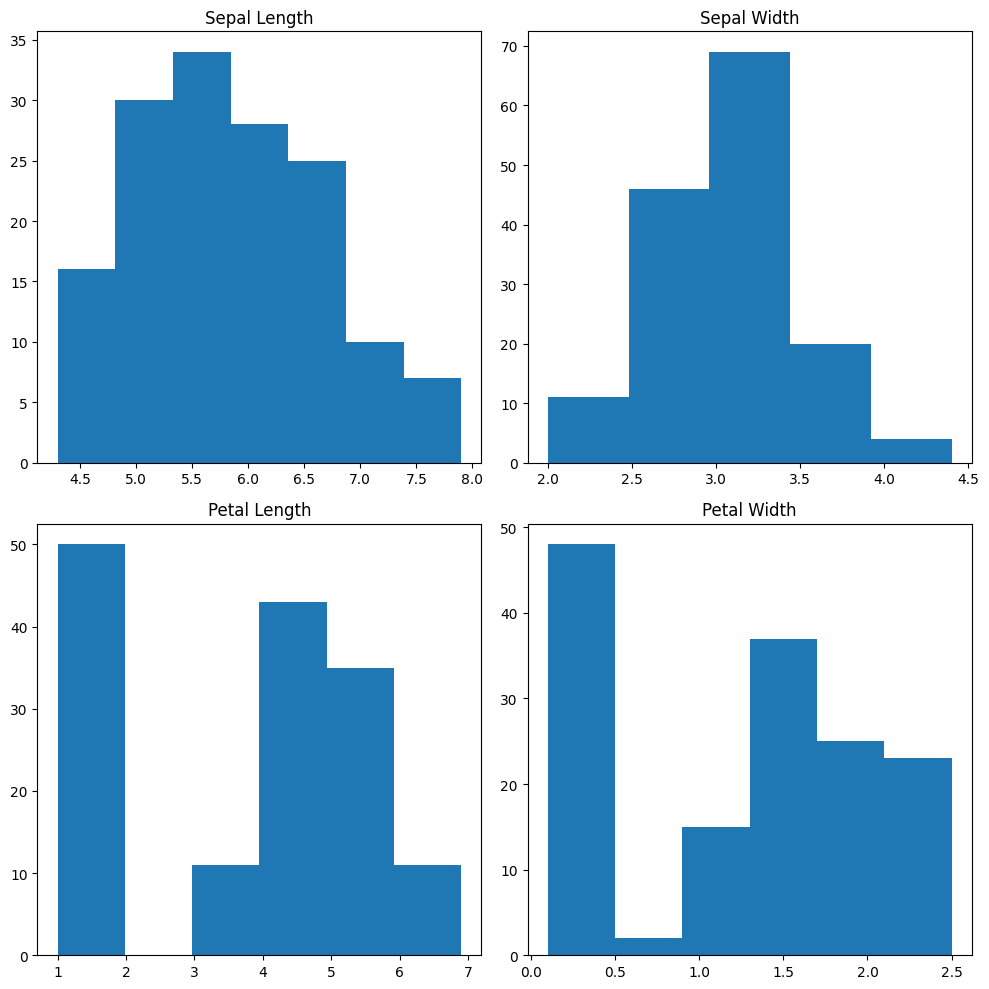

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1 : Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(X["SepalLengthCm"], bins=7)

# Histogram 2 : Sepal Width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(X["SepalWidthCm"], bins=5)

# Histogram 1 : Petal Length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(X["PetalLengthCm"], bins=6)

# Histogram 1 : Petal Width
axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(X["PetalWidthCm"], bins=6)

plt.tight_layout()
plt.show()

MENENTUKAN JUMLAH CLUSTER (k) DENGAN ELBOW METHOD

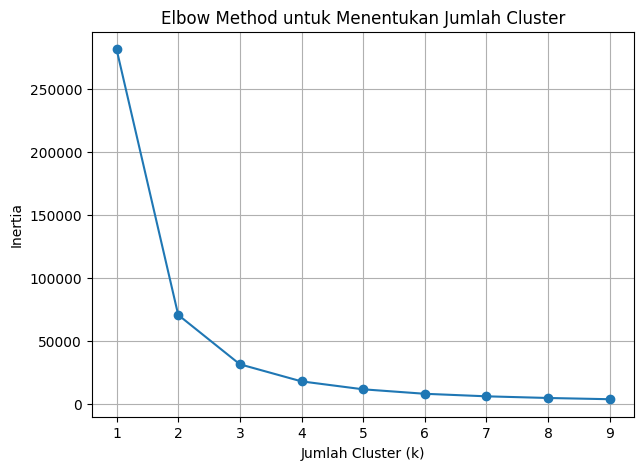

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = [] # Changed from {} to []
K_range = range(1, 10)

for k in K_range:
  km = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
  km.fit(X)
  inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

MEMBANGUN MODEL K-MEANS

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=3, # Karena dataset Iris ada 3 spesies
    init="k-means++",
    random_state=42
)

In [ ]:
df["Cluster"] = kmeans.fit_predict(X)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [2 0 1]


EVALUASI KUALITAS CLUSTERING

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n===== SILHOUETTE SCORE =====")
print("Silhouette Score:", sil_score)


===== SILHOUETTE SCORE =====
Silhouette Score: 0.5816702617893469


CONFUSION MATRIX (PERBANDINGAN DENGAN LABEL ASLI)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n===== CONFUSION MATRIX =====")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


===== CONFUSION MATRIX =====
[[ 1  0 49]
 [49  1  0]
 [ 0 50  0]]


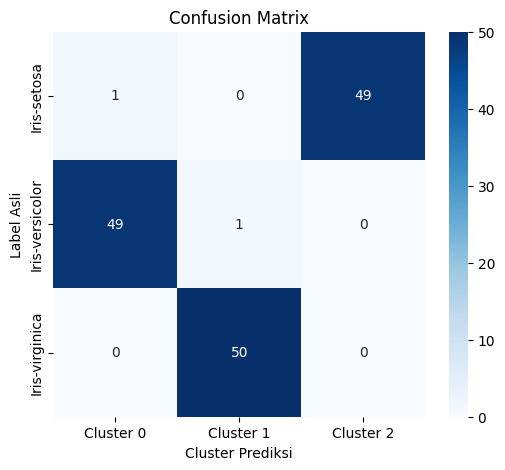

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(
  cm, annot=True, fmt="d", cmap="Blues",
  xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
  yticklabels=le.classes_
)
plt.title("Confusion Matrix")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

2D DAN 3D VISUALISASI HASIL MODEL K-MEANS

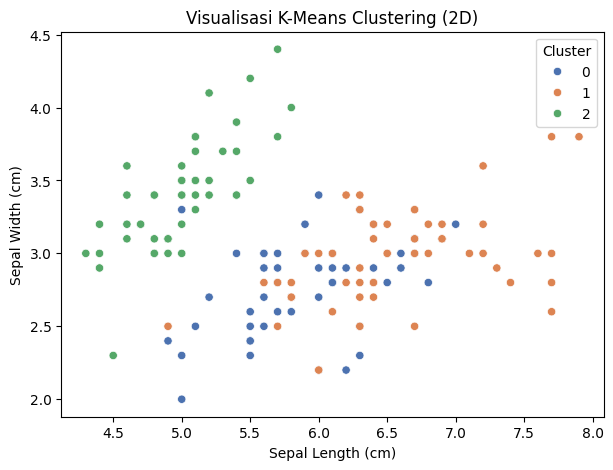

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)

plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

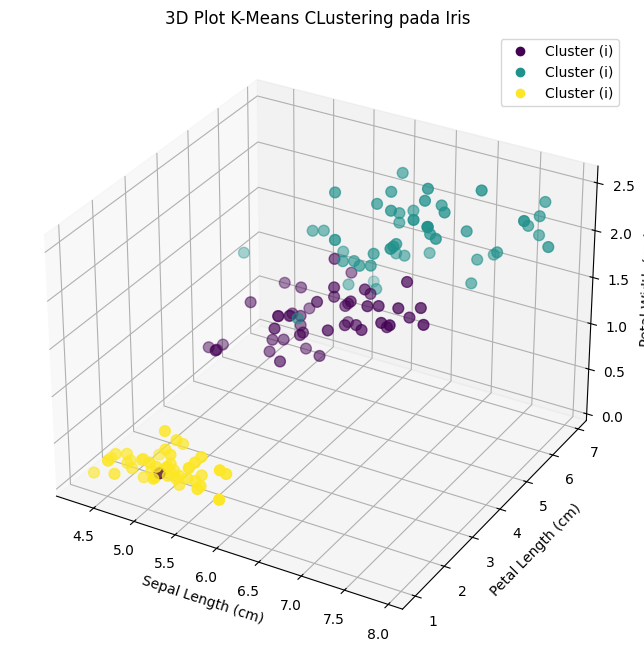

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    df["PetalWidthCm"],
    c=df["Cluster"],
    s=60
)

ax.set_title("3D Plot K-Means CLustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend Cluster
legend_labels = [f"Cluster (i)" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()